In [38]:
from skimage.io import imread, imsave
import skimage.transform
import cv2
import os
import inspect
print(os.getcwd())
import time
import numpy as np
import matplotlib.pyplot as plt

/Users/danbiderman/Dropbox/Columbia/1.Dan/John/DR-VAE


In [6]:
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)

In [16]:
image_folder_path = os.path.join(parent_dir, 'xray-datasets', 'kaggle-pneumonia-jpg',
                          'stage_2_train_images_jpg')
print(image_folder_path)

/Users/danbiderman/Dropbox/Columbia/1.Dan/John/xray-datasets/kaggle-pneumonia-jpg/stage_2_train_images_jpg


In [17]:
im_list = os.listdir(image_folder_path)

'/Users/danbiderman/Dropbox/Columbia/1.Dan/John/xray-datasets/kaggle-pneumonia-jpg/stage_2_train_images_jpg/a6f2530c-65a4-43ea-be9a-4b25870f2582.jpg'

In [82]:
img = imread(os.path.join(image_folder_path, 
             im_list[2]))
img = img[None, :, :]
print(img.shape)
# below read using cv2, shape (1024,1024,3)
# img = cv2.imread(os.path.join(image_folder_path, 
#              im_list[2]))
desired_size = 224

(1, 1024, 1024)


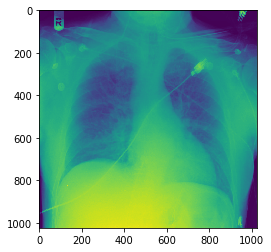

In [79]:
plt.imshow(img[0,:,:])

In [74]:
img = img[0,:,:].reshape(-1,img.shape[1],img.shape[2])
img.shape

(1, 1024, 1024)

In [83]:
# loop and resize n times
img = img[0,:,:]
start_cv2 = time.time()
for _ in range(1):
    resized = cv2.resize(img, (desired_size,desired_size), 
                         interpolation = cv2.INTER_AREA).reshape(
        1, desired_size, 
        desired_size).astype(np.float32)
end_cv2 = time.time()
print(end_cv2 - start_cv2)
print(resized.shape)
print(resized.dtype)

0.0023772716522216797
(1, 224, 224)


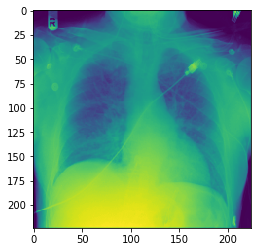

In [84]:
plt.imshow(resized[0,:,:])

dtype('float32')

In [63]:
# loop and resize n times
start_skimage = time.time()
for _ in range(1):
    resized = skimage.transform.resize(img, (1, desired_size, desired_size), 
                                       mode='constant').astype(np.float32)
end_skimage = time.time()
print(end_skimage - start_skimage)

1.757781982421875


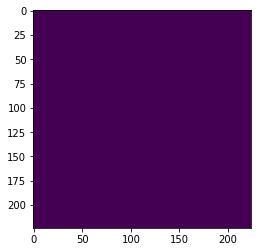

In [64]:
plt.imshow(resized[0,:,:])

In [65]:
resized.shape

(1, 224, 224)

In [ ]:
# load image
img = cv2.imread('/home/img/python.png', cv2.IMREAD_UNCHANGED)
 
print('Original Dimensions : ',img.shape)
 
scale_percent = 60 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 

In [ ]:
# check shape of returned image (should be 1, image size, imagesize)

In [86]:
import warnings
class XRayResizer(object):
    def __init__(self, size):
        self.size = size

    def __call__(self, img):
        '''img: [None, img.shape[0], img.shape[1]] array'''
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            img = img[0,:,:]
            return cv2.resize(img, (self.size, self.size), 
                         interpolation = cv2.INTER_AREA).reshape(
                                1,self.size,self.size).astype(
                                    np.float32)

In [91]:
resizer = XRayResizer(64)

In [92]:
img = imread(os.path.join(image_folder_path, 
             im_list[2]))
img = img[None, :, :]

In [93]:
resized = resizer(img)

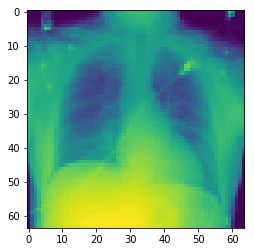

In [95]:
plt.imshow(resized[0,:,:])